# Filtro passa banda

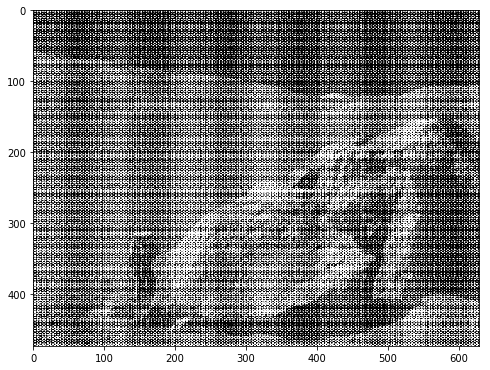

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2, fftfreq, fftshift
import scipy.ndimage as ndi

img = plt.imread('moonlanding.png')
plt.figure(figsize=[8,8])
plt.imshow(img, 'gray')

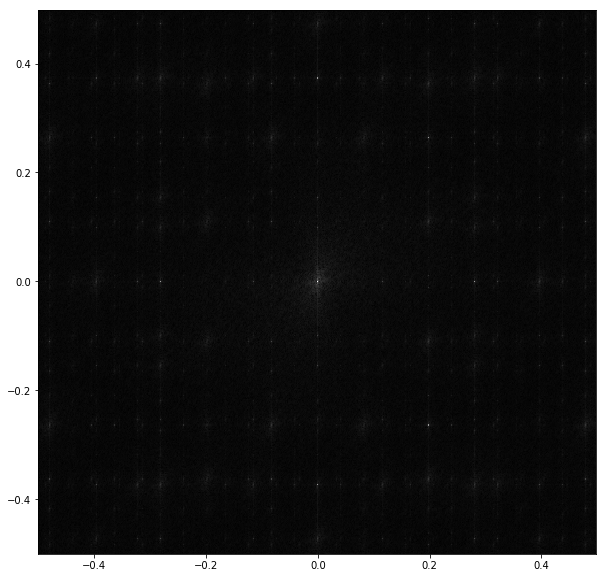

In [2]:
num_rows, num_cols = img.shape

Fimg = fft2(img)
freq_r = fftfreq(num_rows)
freq_c = fftfreq(num_cols)

Fimg = fftshift(Fimg)
freq_r = fftshift(freq_r)
freq_c = fftshift(freq_c)
plt.figure(figsize=[10,10])
plt.pcolormesh(freq_c, freq_r, np.power(np.abs(Fimg), 0.4), cmap='gray')

Note que existem pontos brilhantes em algumas posições do espectro

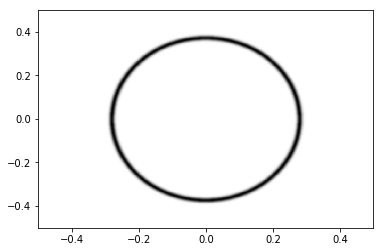

In [3]:
def filtro_passa_banda(img, first_radius, second_radius, 
                       factor):
    num_rows, num_cols = img.shape
    freq_r = fftfreq(num_rows)
    freq_c = fftfreq(num_cols)
    freq_r = fftshift(freq_r)
    freq_c = fftshift(freq_c)    
    
    bp_filter = np.ones([num_rows, num_cols])
    for row in range(num_rows):
        for col in range(num_cols):
            distance = np.sqrt((factor*freq_r[row])**2 + (freq_c[col])**2)
            if distance>=first_radius and distance<second_radius:
                bp_filter[row, col] = 0
    return bp_filter

rc=0.2817
rr=0.3745
factor = rc/rr

bp_filter = filtro_passa_banda(img, 0.275, 0.285, factor)
bp_filter_smooth = ndi.gaussian_filter(bp_filter, sigma=3)
plt.pcolormesh(freq_c, freq_r, bp_filter_smooth, cmap='gray')

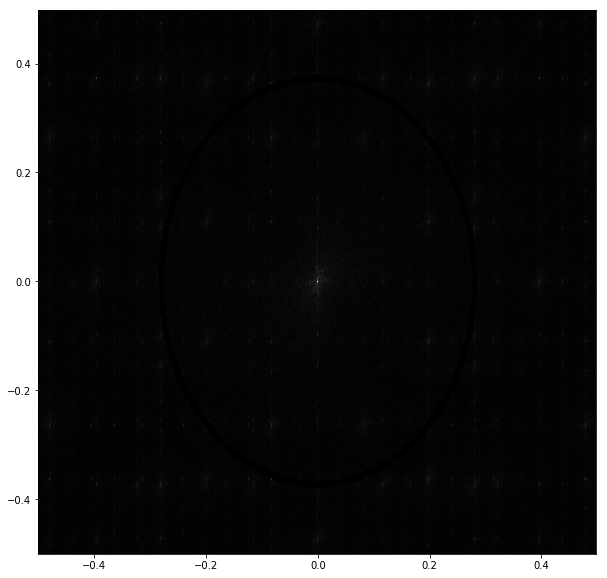

In [4]:
Fimg_filtered = bp_filter*Fimg
plt.figure(figsize=[10,10])
plt.pcolormesh(freq_c, freq_r, np.power(np.abs(Fimg_filtered), 0.5), cmap='gray')

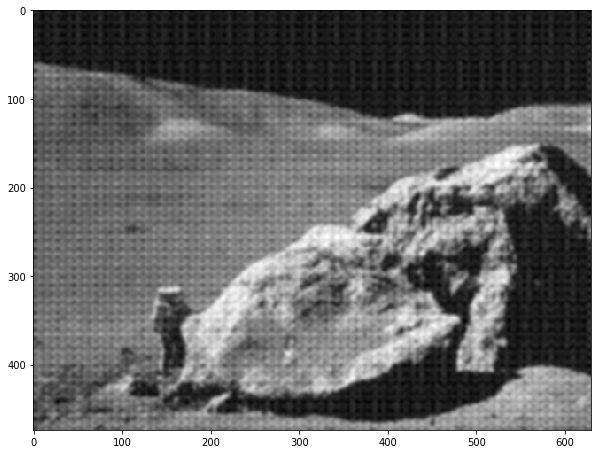

In [5]:
Fimg_filtered = fftshift(Fimg_filtered)
img_filtered = np.real(ifft2(Fimg_filtered))
img_filtered_smooth = ndi.gaussian_filter(np.abs(img_filtered), sigma=2)
plt.figure(figsize=[10,10])
plt.imshow(img_filtered_smooth, 'gray')